In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("insurance.csv")
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
l = lambda a,b: a<b
x = data.loc[l(data["charges"],44000) & (l(36000,data["charges"])) ]["age"]
y = data.loc[l(data["charges"],44000) & (l(36000,data["charges"])) ]["charges"]/1000

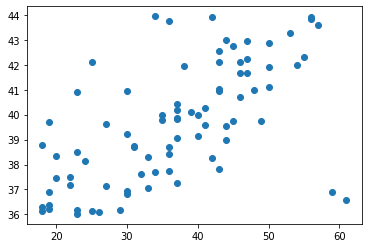

In [6]:
plt.scatter(x,y)

In [7]:
#these methods need to specified beforehand according to curve selected
def linearEq(x,param):
    return param[0]*x + param[1]

def linearGradient(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return np.array([(-2/n)*sum(x*(y-yHat)), (-2/n)*sum(y-yHat)])

def linearCost(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return (1/n)*sum((y-yHat)**2)

In [8]:
def gradientDescent(param, gradient, cost, learningRate = 0.00001, iterations = 1000, precision = 0.001):
    cost_each_it = []
    
    for it in range(iterations):    
        cost_each_it.append(cost(x,y,param))
        
        stepSize = learningRate*gradient(x,y,param)
        
        if(all(np.abs(stepSize) < precision)): 
            break
        
        param = param - stepSize
            
    return param, cost_each_it

In [42]:
param = np.array([0,0])

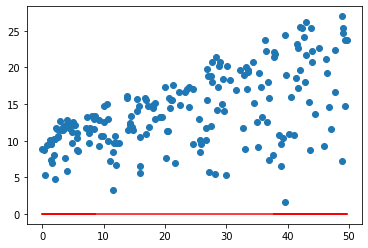

In [43]:
plt.scatter(x,y)
plt.plot(x, linearEq(x,param),'red')

In [44]:
param,costings = gradientDescent(param, linearGradient, linearCost)
param

array([0.42150337, 0.01991979])

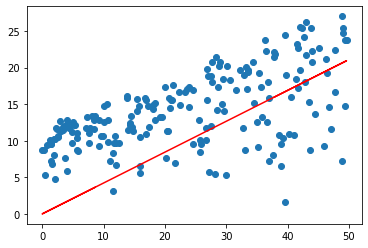

In [45]:
plt.scatter(x,y)
plt.plot(x, linearEq(x,param),'red')

In [46]:
adver = pd.read_csv("Advertising.csv")
adver.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [47]:
x = adver["radio"]
y = adver["sales"]

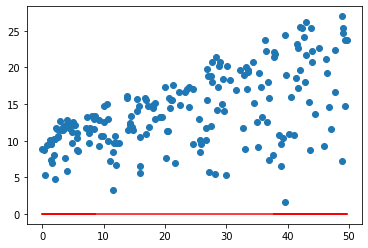

In [48]:
param = np.array([0,0])
plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")

In [49]:
param = np.array([0.0,0.0])

param,costings = gradientDescent(param, linearGradient, linearCost, 0.01, 20, 0.0000001)

param

array([-5.60493928e+22, -1.71513454e+21])

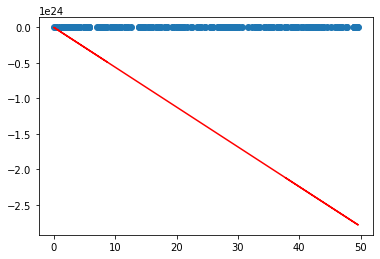

In [50]:
plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")

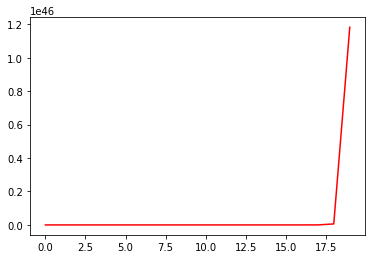

In [51]:
plt.plot(range(len(costings)),costings,"red")

In [52]:
data = pd.read_csv("housing.csv")

x = data["population"]
y = data["median_income"]


data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


C:\Users\HOFFIN\AppData\Local\Temp\ipykernel_10624\3956792157.py:13: RuntimeWarning: invalid value encountered in subtract
  param = param - stepSize


array([nan, nan])

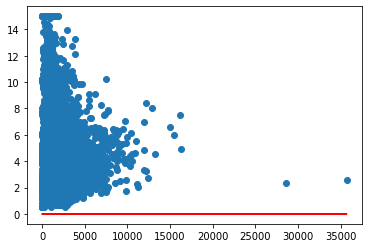

In [20]:
param = np.array([0.0,0.0])

plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")

param, costings = gradientDescent(param, linearGradient, linearCost, 0.001, 100, 0.000001)

param

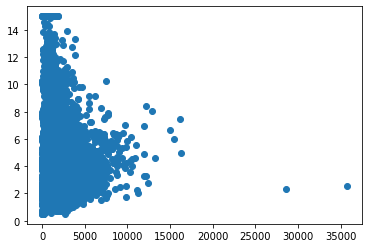

In [21]:
plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")

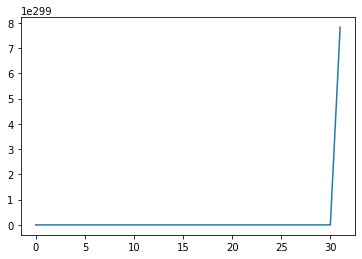

In [22]:
plt.plot(range(len(costings)), costings)
